In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from bmcs_cross_section.api import AnaFRPBending
from bmcs_cross_section.api import ACI440

home_dir = Path().home()
ml_data = home_dir / 'ml_data'
if not ml_data.exists():
    ml_data.mkdir()

### b. 3D_surface visualization of the design space classified by different reinforcment ratios 

C:\Users\adelpasand\AppData\Local\Temp\ipykernel_9500\2344337641.py:54: UserWarning: No contour levels were found within the data range.
  ax1.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
C:\Users\adelpasand\AppData\Local\Temp\ipykernel_9500\2344337641.py:55: UserWarning: No contour levels were found within the data range.
  ax2.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
C:\Users\adelpasand\AppData\Local\Temp\ipykernel_9500\2344337641.py:56: UserWarning: No contour levels were found within the data range.
  contour=ax3.contour(x, y, z, levels=[target_z_value], colors=colors[index])


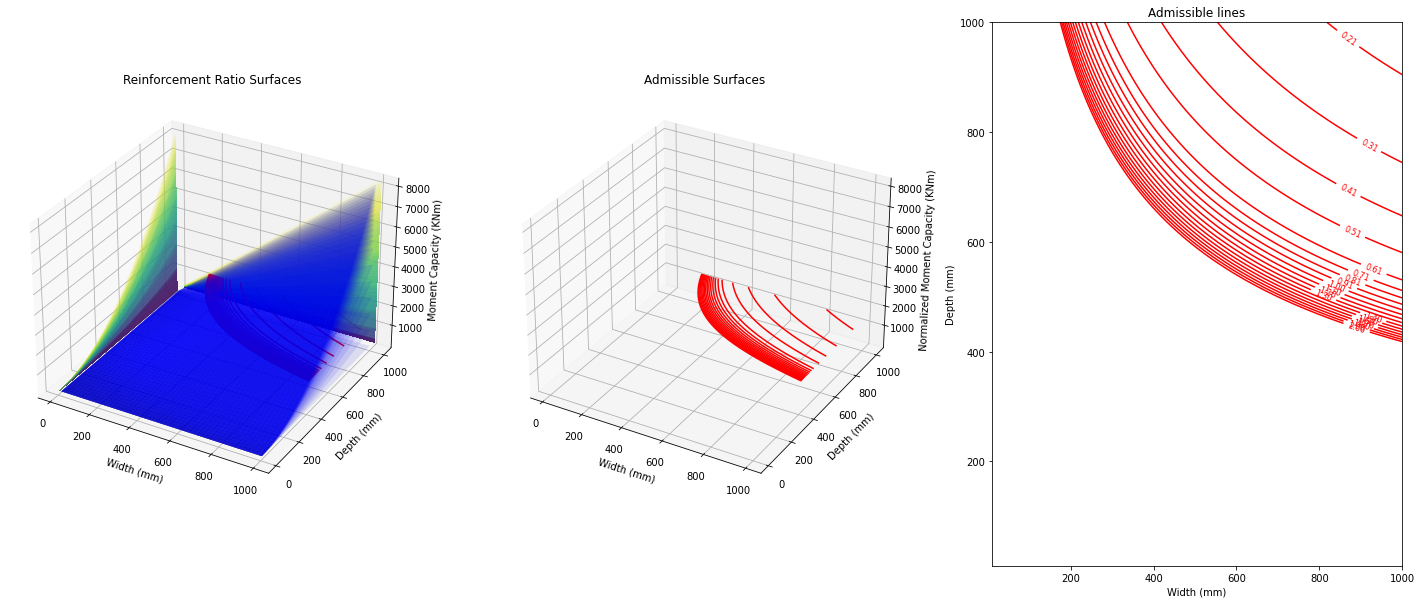

In [7]:
rho_range = np.linspace(0.01, 2, 301)  # Unit: %,  steps:0.01 %
b_range = np.linspace(10, 1000, 100)  # unit: mm, steps: 10 mm %, should not start from 0 to avoid division by zero
d_range = np.linspace(10, 1000, 100)  # unit: mm, steps:10 mm %, should not start from 0 to avoid division by zero

@np.vectorize
def Mn_ACI440 (rho,b,d):
    A_f = rho * b * d /100
    Mn = ACI440.get_M_n(A_f=A_f, f_fu=900, E_f=70000, f_c=50, b=b, d=d)
    # f_c [MPa]: compressive strength of concrete (typically specified compressive strength f'c = f_ck)
    # f_fu [MPa]: tensile strength of FRP reinf.
    # E_f [MPa]: e-modulus of FRP reinf.
    # Balanced FRP reinforcement ratio
    return Mn

rho_b = ACI440.get_rho_balanced(f_c=50, f_fu=900, E_f=70000)*100

x, y = np.meshgrid(b_range, d_range)

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133)
ax1.set_xlabel('Width (mm)')
ax1.set_ylabel('Depth (mm)')
ax1.set_zlabel('Moment Capacity (KNm)')
ax1.set_title('Reinforcement Ratio Surfaces')
ax2.set_xlabel('Width (mm)')
ax2.set_ylabel('Depth (mm)')
ax2.set_zlabel('Normalized Moment Capacity (KNm)')
ax2.set_title('Admissible Surfaces')
ax3.set_xlabel('Width (mm)')
ax3.set_ylabel('Depth (mm)')
ax3.set_title('Admissible lines')

step_to_plot = 15
target_Mu = [1438]
colors = ['r', 'g', 'm', 'k']

for i, rho in enumerate(rho_range[::step_to_plot]):
    z = np.array([[Mn_ACI440(rho, b, d) for b in b_range] for d in d_range])
    ax1.plot_surface(x, y, z, color='b', alpha=0.1)
    cmap = plt.cm.get_cmap('viridis', len(rho_range[::step_to_plot]))
    # ax2.contourf(x, y, z, zdir='z', offset=0, cmap=cmap)
    ax1.contourf(x, y, z, zdir='x', offset=0, cmap=cmap , alpha=0.1)
    ax1.contourf(x, y, z, zdir='y', offset=1050, cmap=cmap, alpha=0.1)
    for index, target_z_value in enumerate(target_Mu):
        # ax1.plot_surface(x, y, z, color=colors[i], alpha=0.6)
        ax1.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
        ax2.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
        contour=ax3.contour(x, y, z, levels=[target_z_value], colors=colors[index])
        ax3.clabel(contour, inline=True, fontsize=8, fmt={target_z_value: f'{rho:.2f}'})

        
plt.show()


paths = contour.collections[0].get_paths()
contour_coords = []
for path in paths:
    vertices = path.vertices
    contour_coords.append(vertices)
contour_coords = np.concatenate(contour_coords)



# takes 30 sec 


C:\Users\adelpasand\AppData\Local\Temp\ipykernel_8960\3076405247.py:42: UserWarning: No contour levels were found within the data range.
  ax1.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
C:\Users\adelpasand\AppData\Local\Temp\ipykernel_8960\3076405247.py:43: UserWarning: No contour levels were found within the data range.
  ax2.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
C:\Users\adelpasand\AppData\Local\Temp\ipykernel_8960\3076405247.py:44: UserWarning: No contour levels were found within the data range.
  contour=ax3.contour(x, y, z, levels=[target_z_value], colors=colors[index])


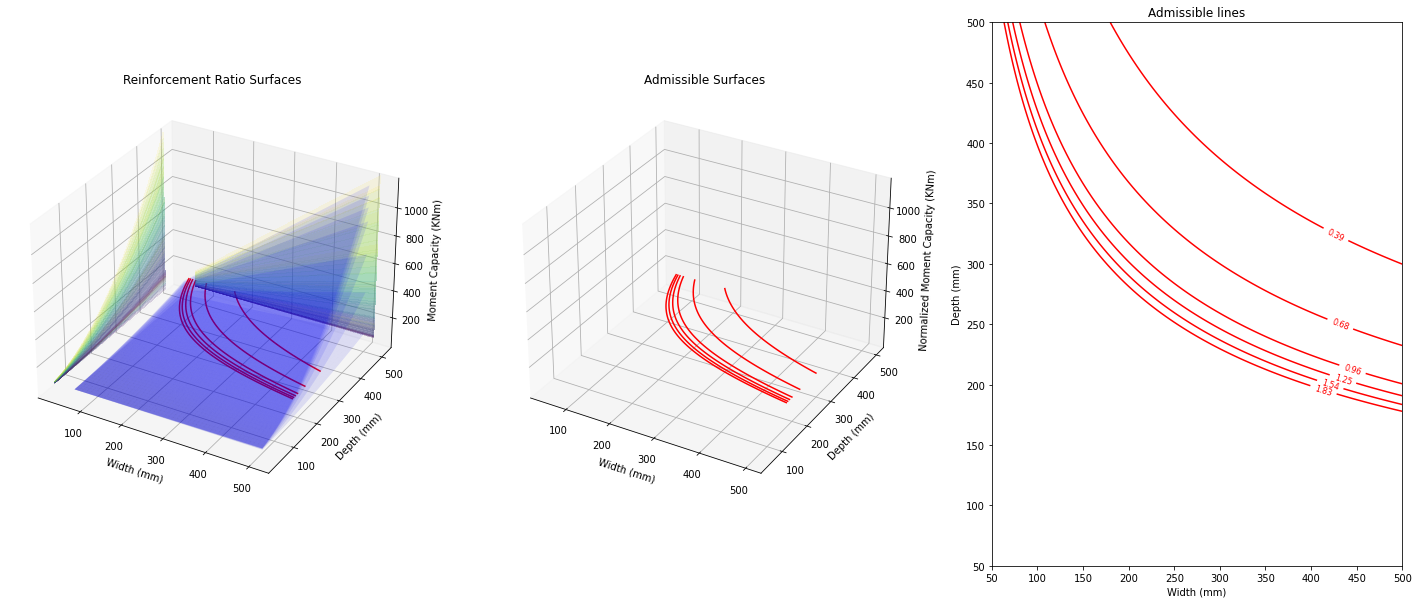

In [54]:

# Define ultimate moment capacity function 
def f(p, b, d):
    A_f = p * b * d / 100
    Mu = AnaFRPBending(A_f=A_f, f_cm = 50, E_f = 70000, f_fu = 900, b=b, d=d).M_u
    return Mu

# Generate input values
p_range = np.linspace(0.1, 2, 100)   # rainforcement ratio (Percent)
b_range = np.linspace(50, 500, 100)  # Width (mm)
d_range = np.linspace(50, 500, 100)  # Depth (mm)
x, y = np.meshgrid(b_range, d_range)

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133)
ax1.set_xlabel('Width (mm)')
ax1.set_ylabel('Depth (mm)')
ax1.set_zlabel('Moment Capacity (KNm)')
ax1.set_title('Reinforcement Ratio Surfaces')
ax2.set_xlabel('Width (mm)')
ax2.set_ylabel('Depth (mm)')
ax2.set_zlabel('Normalized Moment Capacity (KNm)')
ax2.set_title('Admissible Surfaces')
ax3.set_xlabel('Width (mm)')
ax3.set_ylabel('Depth (mm)')
ax3.set_title('Admissible lines')

step_to_plot = 15
target_Mu = [150]
colors = ['r', 'g', 'm', 'k']

for i, rho in enumerate(p_range[::step_to_plot]):
    z = np.array([[f(rho, b, d) for b in b_range] for d in d_range])
    ax1.plot_surface(x, y, z, color='b', alpha=0.1)
    cmap = plt.cm.get_cmap('viridis', len(p_range[::step_to_plot]))
    # ax2.contourf(x, y, z, zdir='z', offset=0, cmap=cmap)
    ax1.contourf(x, y, z, zdir='x', offset=0, cmap=cmap , alpha=0.1)
    ax1.contourf(x, y, z, zdir='y', offset=550, cmap=cmap, alpha=0.1)
    for index, target_z_value in enumerate(target_Mu):
        # ax1.plot_surface(x, y, z, color=colors[i], alpha=0.6)
        ax1.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
        ax2.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
        contour=ax3.contour(x, y, z, levels=[target_z_value], colors=colors[index])
        ax3.clabel(contour, inline=True, fontsize=8, fmt={target_z_value: f'{rho:.2f}'})

        
plt.show()


paths = contour.collections[0].get_paths()
contour_coords = []
for path in paths:
    vertices = path.vertices
    contour_coords.append(vertices)
contour_coords = np.concatenate(contour_coords)




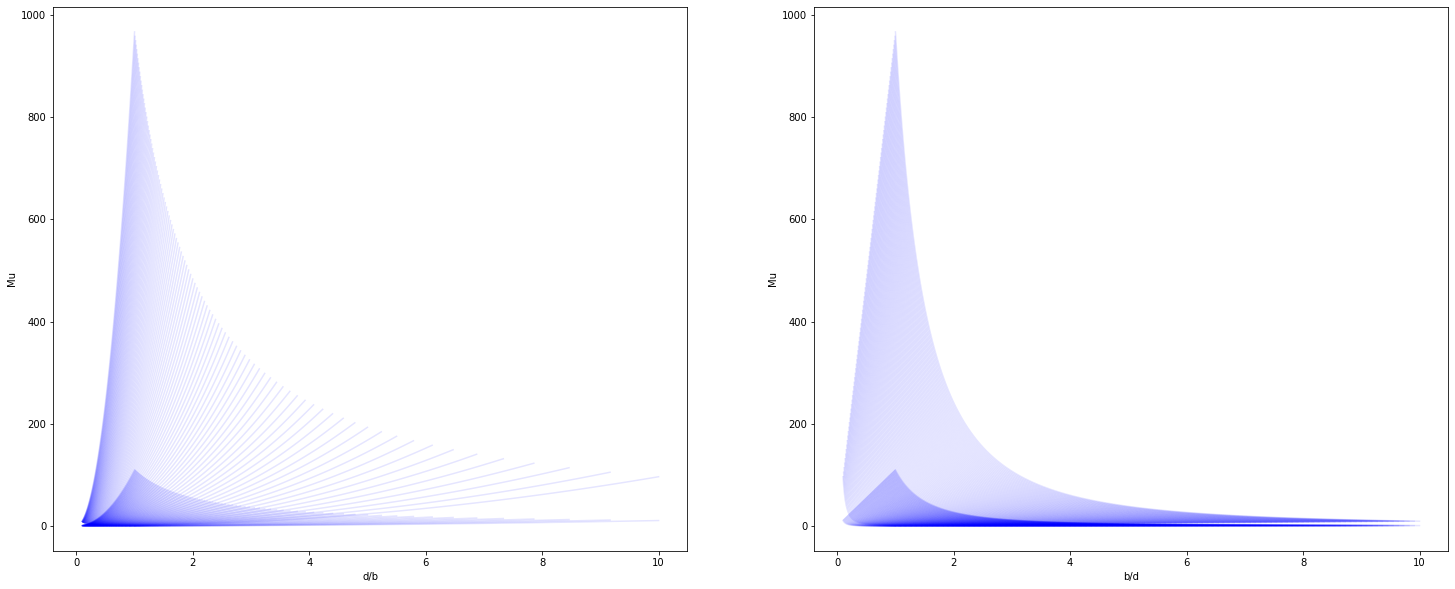

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from bmcs_cross_section.api import AnaFRPBending
from matplotlib.colors import LinearSegmentedColormap

# Define ultimate moment capacity function 
def f(p, b, d):
    A_f = p * b * d / 100
    Mu = AnaFRPBending(A_f=A_f, f_cm = 50, E_f = 70000, f_fu = 900, b=b, d=d).M_u
    return Mu

# Generate input values
p_range = np.linspace(0.1, 2, 100)   # rainforcement ratio (Percent)
b_range = np.linspace(50, 500, 100)  # Width (mm)
d_range = np.linspace(50, 500, 100)  # Depth (mm)
x, y = np.meshgrid(b_range, d_range)

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xlabel('d/b')
ax1.set_ylabel('Mu')
ax2.set_xlabel('b/d')
ax2.set_ylabel('Mu')


step_to_plot = 50
target_Mu = [150, 400, 600, 900]
colors = ['r', 'g', 'm', 'k']
for i, rho in enumerate(p_range[::step_to_plot]):
    z = np.array([[f(rho, b, d) for b in b_range] for d in d_range])
    ax1.plot(y/x, z, color='b', alpha=0.1)

for i, rho in enumerate(p_range[::step_to_plot]):
    z = np.array([[f(rho, b, d) for b in b_range] for d in d_range])
    ax2.plot(x/y, z, color='b', alpha=0.1)
        
plt.show()